# Clustering (Crime Data)

Shubham's Assignment

In [1]:
#import libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, float, array
import numpy as np
import seaborn as sns
%matplotlib inline

C:\Users\Shubham\AppData\Local\Temp\ipykernel_15576\1981789189.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from numpy import random, float, array


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load data
crime=pd.read_csv("crime_data.csv")
crime.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
crime.shape

(50, 5)

In [5]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
#Normalization Function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [7]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime.iloc[:,1:])
df_norm.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000
std,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904
50%,0.388554,0.390411,0.576271,0.330749
75%,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000


In [8]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch 

In [9]:
# for creating dendrogram

In [10]:
z = linkage(df_norm, method="complete",metric="euclidean")
z

array([[1.40000000e+01, 2.80000000e+01, 4.99862313e-02, 2.00000000e+00],
       [1.20000000e+01, 3.10000000e+01, 8.71860232e-02, 2.00000000e+00],
       [1.30000000e+01, 1.50000000e+01, 1.07560045e-01, 2.00000000e+00],
       [2.20000000e+01, 4.80000000e+01, 1.24475500e-01, 2.00000000e+00],
       [1.90000000e+01, 3.00000000e+01, 1.32688717e-01, 2.00000000e+00],
       [3.50000000e+01, 4.50000000e+01, 1.44578065e-01, 2.00000000e+00],
       [3.60000000e+01, 4.60000000e+01, 1.48312560e-01, 2.00000000e+00],
       [1.80000000e+01, 5.00000000e+01, 1.64643019e-01, 3.00000000e+00],
       [4.00000000e+01, 4.70000000e+01, 1.78647476e-01, 2.00000000e+00],
       [4.90000000e+01, 5.50000000e+01, 1.80637986e-01, 3.00000000e+00],
       [2.50000000e+01, 2.60000000e+01, 1.85305888e-01, 2.00000000e+00],
       [3.40000000e+01, 3.70000000e+01, 1.91633219e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.96467627e-01, 2.00000000e+00],
       [2.30000000e+01, 3.90000000e+01, 1.98104543e

In [11]:
crime.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [12]:
#Graphical Visualization

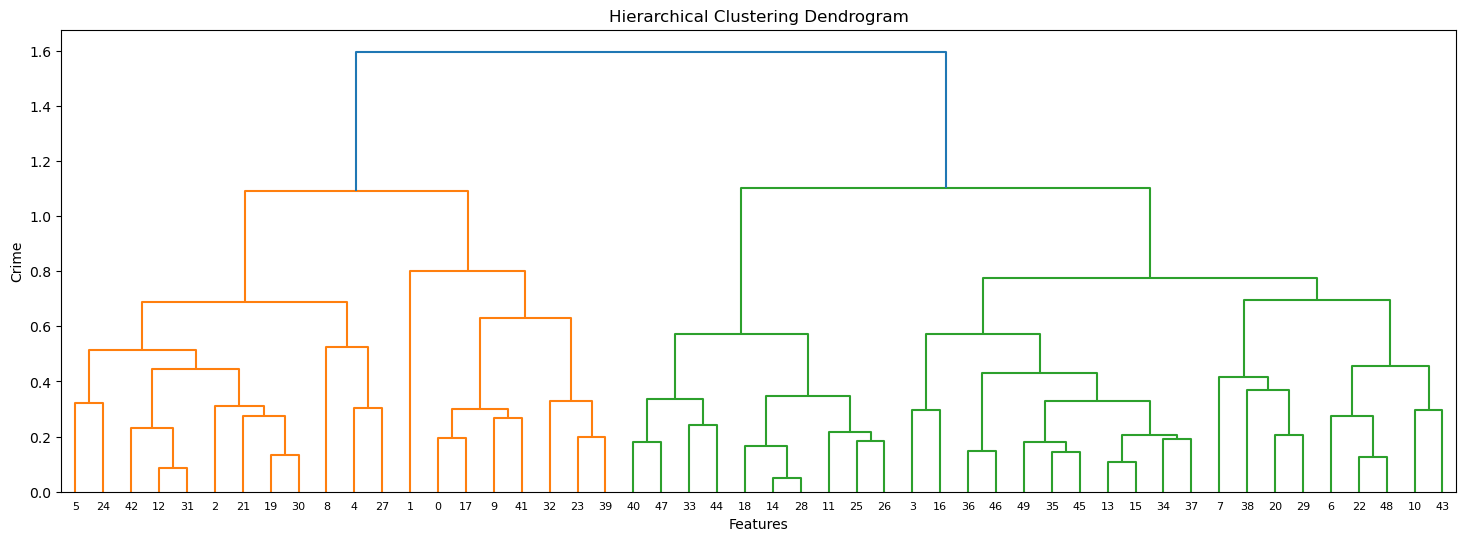

In [13]:
plt.figure(figsize=(18, 6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Crime')
sch.dendrogram(z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()


In [14]:
#screw plot / elbow curve
k = list(range(2,15))
k

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [15]:
from sklearn.cluster import	KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [16]:
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x1cddd808a30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

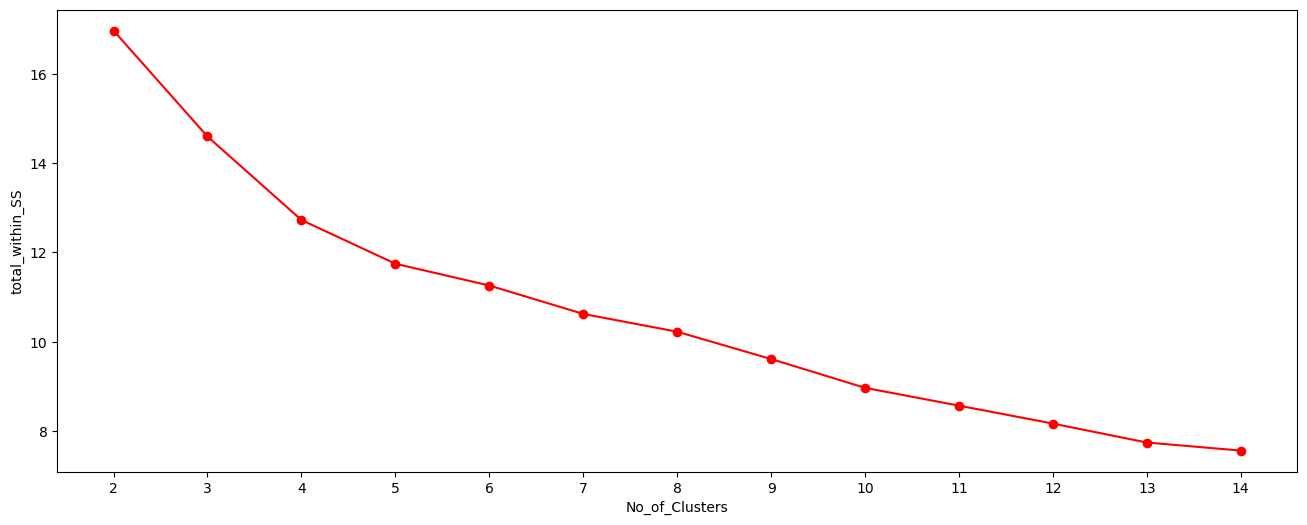

In [17]:
# Scree plot 
plt.figure(figsize=(16,6))
plt.plot(k,TWSS,'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [18]:
# The elbow appear to be smoothening out after four clusters indicating that the optimal number of clusters is 4.

In [19]:
# Selecting 4 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=4) 
model.fit(df_norm)

KMeans(n_clusters=4)

In [20]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10,
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', n_clusters=4, n_init=10)

In [21]:
model.labels_ # getting the labels of clusters assigned to each row 

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [22]:
model.cluster_centers_

array([[0.29254518, 0.32148973, 0.70974576, 0.29667313],
       [0.60333642, 0.72734457, 0.74576271, 0.66905188],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

In [23]:
X = crime[['Murder', 'Assault', 'Rape', 'UrbanPop']]
clusters = KMeans(4)  # 4 clusters!
clusters.fit( X )
clusters.cluster_centers_
clusters.labels_
crime['Crime_clusters'] = clusters.labels_
crime.head()
crime.sort_values(by=['Crime_clusters'],ascending = True)
X.head()


,Murder,Assault,Rape,UrbanPop
0,13.2,236,21.2,58
1,10.0,263,44.5,48
2,8.1,294,31.0,80
3,8.8,190,19.5,50
4,9.0,276,40.6,91


In [24]:
stats =crime.sort_values("Murder", ascending=True)
stats

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Crime_clusters
33,North Dakota,0.8,45,44,7.3,0
28,New Hampshire,2.1,57,56,9.5,0
18,Maine,2.1,83,51,7.8,0
14,Iowa,2.2,56,57,11.3,0
44,Vermont,2.2,48,32,11.2,0
48,Wisconsin,2.6,53,66,10.8,0
11,Idaho,2.6,120,54,14.2,3
22,Minnesota,2.7,72,66,14.9,0
43,Utah,3.2,120,80,22.9,3
6,Connecticut,3.3,110,77,11.1,3


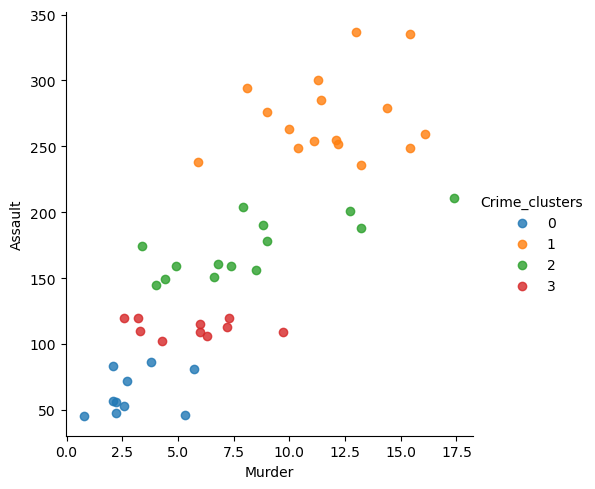

In [25]:
# Plot between pairs Murder~Assault
sns.lmplot( 'Murder','Assault',  data=crime,
        hue = 'Crime_clusters',
        fit_reg=False, size = 5 );

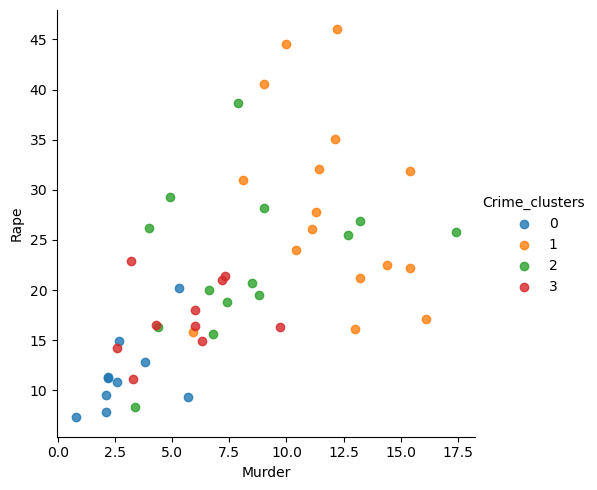

In [26]:
# Plot between pairs Murder~Rape
sns.lmplot( 'Murder','Rape',  data=crime,
        hue = 'Crime_clusters',
        fit_reg=False, size = 5 );

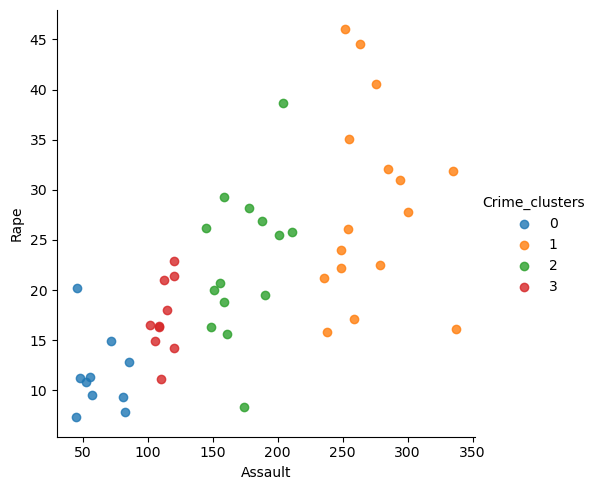

In [27]:
# Plot between pairs Assault~Rape
sns.lmplot( 'Assault','Rape',  data=crime,
        hue = 'Crime_clusters',
        fit_reg=False, size = 5 );

In [28]:
#dots represent states of US and different colors are one cluster showing clustering for the crime data.

In [29]:
# Done